<a href="https://colab.research.google.com/github/dassouvik123/Covid-19_Detection/blob/main/VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/X-Ray Image DataSet/Train'
valid_path = '/content/drive/MyDrive/X-Ray Image DataSet/test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/X-Ray Image DataSet/Train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/X-Ray Image DataSet/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/X-Ray Image DataSet/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
29/29 [==============================] - 697s 23s/step - loss: 1.2821 - accuracy: 0.5248 - val_loss: 0.5855 - val_accuracy: 0.7333
Epoch 2/15
29/29 [==============================] - 292s 10s/step - loss: 0.6149 - accuracy: 0.7380 - val_loss: 0.4576 - val_accuracy: 0.7667
Epoch 3/15
29/29 [==============================] - 292s 10s/step - loss: 0.5132 - accuracy: 0.7791 - val_loss: 0.5122 - val_accuracy: 0.7667
Epoch 4/15
29/29 [==============================] - 292s 10s/step - loss: 0.4896 - accuracy: 0.8025 - val_loss: 0.3921 - val_accuracy: 0.8000
Epoch 5/15
29/29 [==============================] - 293s 10s/step - loss: 0.4454 - accuracy: 0.8170 - val_loss: 0.5038 - val_accuracy: 0.7500
Epoch 6/15
29/29 [==============================] - 293s 10s/step - loss: 0.3906 - accuracy: 0.8272 - val_loss: 0.3857 - val_accuracy: 0.8833
Epoch 7/15
29/29 [==============================] - 291s 10s/step - loss: 0.3827 - accuracy: 0.8346 - val_loss: 0.4211 - val_accuracy: 0.8667
Epoch 

KeyboardInterrupt: ignored

ValueError: ignored

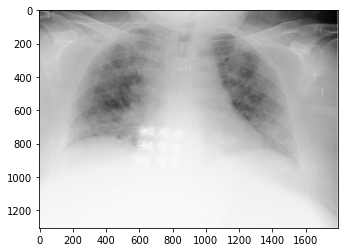

In [22]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model

from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

import tensorflow as tf
import numpy as np

image_size = 224

# Load pre-trained Keras model and the image to classify
model = tf.keras.applications.vgg16.VGG16()
img = plt.imread('/content/drive/MyDrive/X-Ray Image DataSet/Train/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')
plt.imshow(img)
#print(img.shape)
img_tensor = preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = preprocess_input(img_tensor)

conv_layer = model.get_layer("block5_conv3")
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(img_tensor)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)
import matplotlib.pyplot as plt
hm=np.squeeze(heatmap)
hm.shape
plt.imshow(hm)

In [18]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model

from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

import tensorflow as tf
import numpy as np

image_size = 224

# Load pre-trained Keras model and the image to classify
model = tf.keras.applications.vgg16.VGG16()
image = np.random.random((image_size, image_size, 3))
img_tensor = preprocessing.image.img_to_array(image)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = preprocess_input(img_tensor)

conv_layer = model.get_layer("block5_conv3")
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(img_tensor)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)

ValueError: ignored

(1307, 1793, 3)


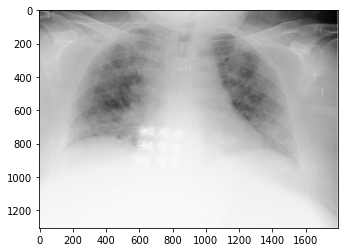

In [20]:
img = plt.imread('/content/drive/MyDrive/X-Ray Image DataSet/Train/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')
plt.imshow(img)
print(img.shape)


In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model

from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

import tensorflow as tf
import numpy as np

image_size = 224

# Load pre-trained Keras model and the image to classify
model = tf.keras.applications.vgg16.VGG16()
image = np.random.random((image_size, image_size, 3))
img_tensor = preprocessing.image.img_to_array(image)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = preprocess_input(img_tensor)

conv_layer = model.get_layer("block5_conv3")
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(img_tensor)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)

In [16]:
import cv2
import matplotlib.pyplot as plt
def get_class_activation_map() :
    
    img_path =  '/content/drive/MyDrive/X-Ray Image DataSet/Train/covid'
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img,axis=0)
    
    predict = model.predict(img)
    target_class = np.argmax(predict[0])
    last_conv = model.get_layer('block5_conv3')
    grads =K.gradients(model.output[:,target_class],last_conv.output)[0]
    pooled_grads = K.mean(grads,axis=(0,1,2))
    iterate = K.function([model.input],[pooled_grads,last_conv.output[0]])
    pooled_grads_value,conv_layer_output = iterate([img])
    
    for i in range(512):
        conv_layer_output[:,:,i] *= pooled_grads_value[i]
    
    heatmap = np.mean(conv_layer_output,axis=-1)
    
    for x in range(heatmap.shape[0]):
        for y in range(heatmap.shape[1]):
            heatmap[x,y] = np.max(heatmap[x,y],0)
    heatmap = np.maximum(heatmap,0)
    heatmap /= np.max(heatmap)
    plt.imshow(heatmap)
    img_gray = cv2.cvtColor(img[0], cv2.COLOR_BGR2GRAY)
    upsample = cv2.resize(heatmap, (224,224))
   
    output_path_gradcam = '/content/drive/MyDrive/X-Ray Image DataSet' + 'gradcam.jpeg'
    plt.imsave(output_path_gradcam,upsample * img_gray)

In [17]:

get_class_activation_map()

error: ignored

In [ ]:
# evaluate the model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
y_true = test_set.classes
predictions = model.predict_generator(test_set)
predicted_classes = np.argmax(predictions,axis=1)

def scores(y_true,y_pred):
  accuracy = accuracy_score(y_true,y_pred)
  precision = precision_score(y_true,y_pred,average='macro')
  recall = recall_score(y_true,y_pred,average='macro')
  f1 = f1_score(y_true,y_pred,average='macro')
  confusionmatrix = confusion_matrix(y_true, y_pred)
  print("Accuracy:  {}".format(accuracy))
  print("Precision: {}".format(precision))
  print("Recall:    {}".format(recall))
  print("F1:        {}".format(f1))
  print("Confusion matrix:\n{}".format(confusionmatrix))

scores(y_true,predicted_classes)

In [ ]:
y_pred = model.predict_generator(test_set, steps=len(test_set), verbose=1)
y_pred = y_pred.argmax(axis=-1)
y_true = test_set.classes
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
precision = precision_score(y_true, y_pred) 
recall = recall_score(y_true, y_pred) 
f1 = f1_score(y_true, y_pred) 
confusion = confusion_matrix(y_true, y_pred, labels=None, sample_weight=None, normalize=None)
print("-"*70)
print("Report")
print("-"*70)
print("%s%.2f%s"% ("Precision     : ", precision*100, "%"))
print("%s%.2f%s"% ("Recall        : ", recall*100,    "%"))
print("%s%.2f%s"% ("F1-Score      : ", f1*100,        "%"))
print("-"*70)
print("\n\n")

cls_report_print = classification_report(y_true, y_pred, target_names=['covid', 'Normal'])

cls_report = classification_report(y_true, y_pred, target_names=['covid', 'Normal'], output_dict=True)

print("-"*70)
print("covid Prediction")
print("-"*70)
print(cls_report_print)
print("-"*70)

print("confusion matrix    :" , confusion)